In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

#   CNN Encoder using TensorFlow/Keras with the Mnsit dataset

In [ ]:
#Import data
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
# convert default typen to float32 for more numerical stability and efficiency for in deep learning framework
# Normalizes the pixel values from the range [0, 255] (grayscale intensity) to [0, 1]
  # we do this because Gradient descent convert better with a small, consistent range.
  # Neural networks perform better with normalized inputs
  #Large values can cause gradients to become too small or too large.

# len(x_train): Keeps the number of training samples unchanged.
# 28, 28: each image remains 28×28 pixels
# Adds a channel dimension


In [ ]:
# MNIST dataset is loaded as (num_samples, 28, 28) a 2D structure (batch size, height, width)
# CNNs (Convolutional Neural Networks) expect images to be in the format (batch_size, height, width, channels).
# Reshaping ensures compatibility with CNN architectures

In [ ]:
# _ discards the selected column

In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder : Feature Extraction
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder: Reconstruction
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# How the Encoder is extrating the feature and reducing the dimesonality
# First Convolution + Pooling
# The encoder compresses the input image into a lower-dimensional representation (latent space).
# amount of filters (also called kernels)
# Uses ReLU activation to introduce non-linearity
#"same" padding ensures the output size remains (28, 28, 16)
# Current shape:  (28, 28, 1) --> (28, 28, 16)

# Downsamples (reduces spatial size by half) while retaining important features.
#"same" padding ensures it still fits neatly into the next layer.
# Current shape: (14, 14, 16)


# Second Convolution + Pooling
#Current shape: (14, 14, 8 ) after applying 8 filter ton reduce depth - focusing on more abstract features
#Current shape: (7, 7, 8 ) after applying MaxPooling2D (2,2) to reduce spatial size

#Third Convolution + Pooling (Latent Space)
#Current shape: (7, 7, 8 ) after applying Conv2D
#Current shape: (4, 4, 8 ) after applying MaxPooling2D (2,2) to reduce spatial size


# 28×28 image --->  4×4 with only 8 channels

In [ ]:
# Decoder: Reconstruction
# First Convolution + Upsampling
# Conv2D(8, (3,3)) expands the feature maps from the latent space.
# UpSampling2D((2, 2))(x) doubles the spatial dimensions
# Current shape:  (4, 4, 8) --> (8, 8, 8)

# Second Convolution + Upsampling
# current shape:  (4, 4, 8) --> (16, 16, 8)

# Third Convolution + Upsampling
# current shape:  (16, 16, 8) --> (28, 28, 16)

# decoded : 1 output channel (grayscale image) and Sigmoid activation pixel values are in [0,1]


In [ ]:
# Latent Space (4×4×8)
  #  Upsampling → (8, 8, 8)
  #  Upsampling → (16, 16, 8)
  #  Upsampling → (28, 28, 16)
  #  Output Layer → (28, 28, 1)


In [ ]:
# autoencoder maps the images input to the decoded
#the Adam optimizer is a  optimization algorithm (Adaptive Moment Estimation)
# binary cross-entropy is the loss function becasue the image is binary-like after normalization

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.3865 - val_loss: 0.1672
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1591 - val_loss: 0.1395
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1373 - val_loss: 0.1278
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1274 - val_loss: 0.1215
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1214 - val_loss: 0.1172
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1176 - val_loss: 0.1139
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1143 - val_loss: 0.1113
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1121 - val_loss: 0.1094
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1098 - val_loss: 0.1076
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1084 - val_loss: 0.1062
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1071 - val_loss: 0.1050
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/st

In [ ]:
#fit function
# shuffle : Randomly shuffles the training data before each epoch.
# This helps stop the model from remembering patterns and helps generalization

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


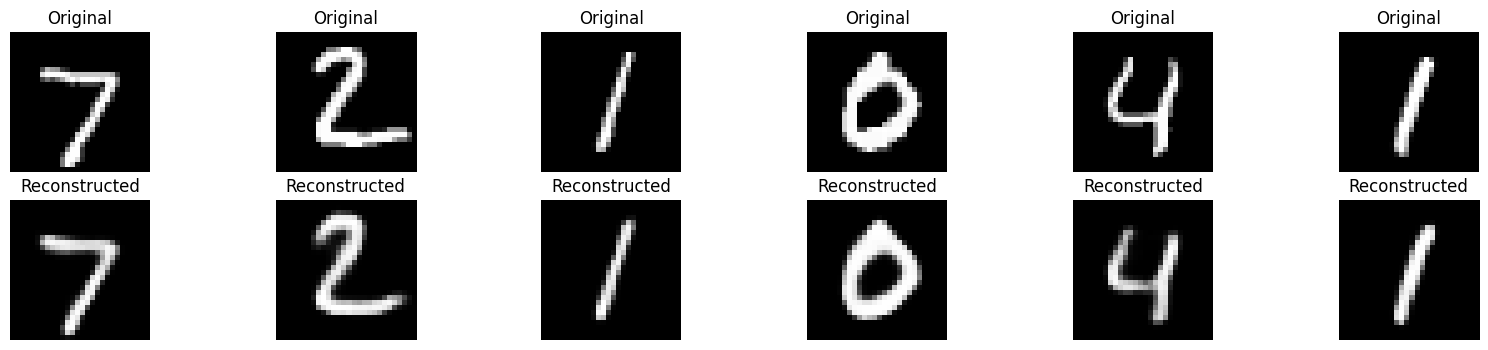

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# reconstructed images
decoded_imgs = autoencoder.predict(x_test)


n = 6  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test), verbose=1)

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.title("Training vs Validation Loss")
# plt.show()